## Ada Boost Classifier ##

1. Importar las librerías

In [80]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Cargar el dataset

Documentación del dataset:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html


In [82]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
df = pd.concat([X, y], axis=1)

In [83]:
print(data.target_names)
print(set(data.target))

['malignant' 'benign']
{np.int64(0), np.int64(1)}


In [84]:
# EDA

In [85]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [87]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [88]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [89]:
df.duplicated().sum()

np.int64(0)

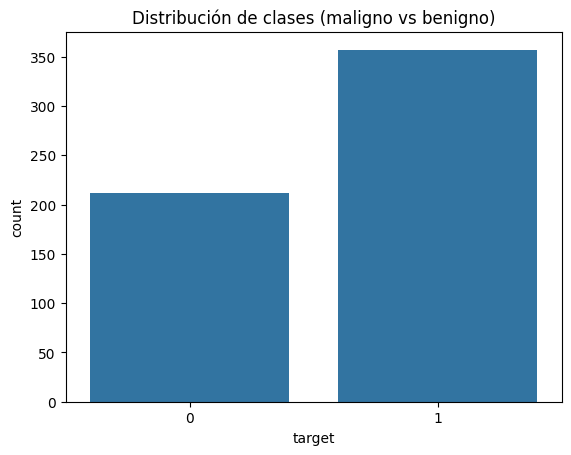

In [90]:
sns.countplot(x='target', data=df)
plt.title("Distribución de clases (maligno vs benigno)")
plt.show()

In [91]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

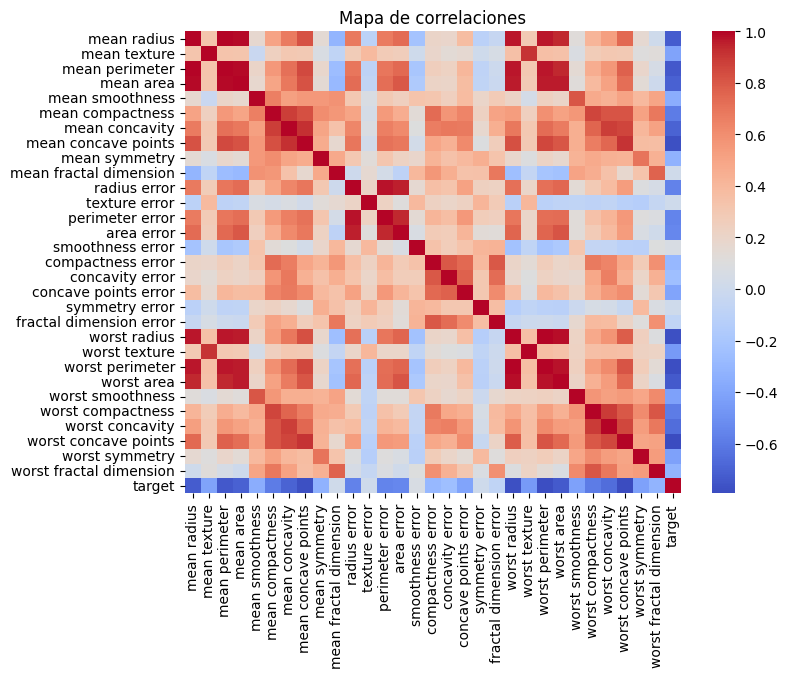

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Mapa de correlaciones")
plt.show()
# Funciana mejor en relaciones lineales

3. Dividir en entrenamiento, validación y prueba

In [93]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# 20% -> test
# 80% -> validación y entrenamiento

In [95]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

4. Crear el modelo base (stump)

In [96]:
# Crear un clasificador base débil: un árbol de decisión con profundidad 1 (stump)

base_estimator = DecisionTreeClassifier(max_depth=1)

5. Crear el modelo AdaBoost

In [97]:
# Configurar el modelo AdaBoost con el clasificador base

ada_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,       # Número de clasificadores débiles
    learning_rate=1.0,     # Tasa de aprendizaje
    random_state=42
)

6.  Entrenar el modelo

In [98]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [99]:
# Cuánto aporta esa variable a la predicción
importances = ada_model.feature_importances_
importances

array([0.        , 0.11092559, 0.        , 0.05270863, 0.01598769,
       0.        , 0.01550324, 0.05240712, 0.        , 0.03565896,
       0.01751888, 0.        , 0.03489423, 0.05426411, 0.0255823 ,
       0.05384593, 0.        , 0.02254855, 0.03922921, 0.        ,
       0.01930167, 0.07448564, 0.        , 0.07895966, 0.03732722,
       0.        , 0.05784682, 0.1194877 , 0.08151687, 0.        ])

In [104]:
feature_importances = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': ada_model.feature_importances_
})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

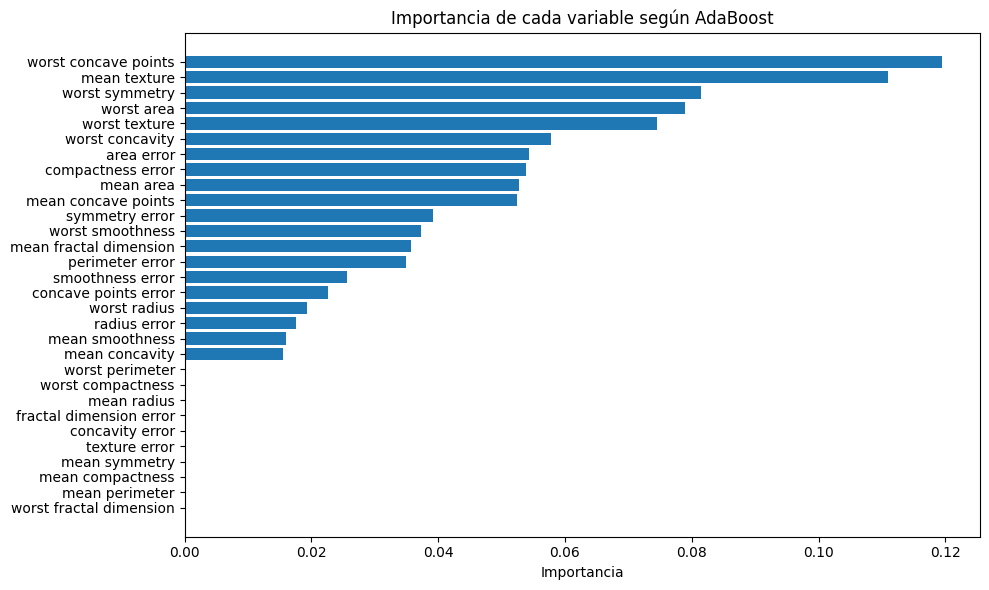

In [105]:
plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel("Importancia")
plt.title("Importancia de cada variable según AdaBoost")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

7. Evaluar en validación

In [102]:
val_preds = ada_model.predict(X_val)

print("Validación:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("F1 Score:", f1_score(y_val, val_preds))
print("ROC AUC:", roc_auc_score(y_val, val_preds))

print("\n\n\nReporte de clasificación en Validación:")
print(classification_report(y_val, val_preds))

Validación:
Accuracy: 0.9649122807017544
F1 Score: 0.9714285714285714
ROC AUC: 0.9629870129870131



Reporte de clasificación en Validación:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.97      0.97      0.97        70

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



8. Evaluar Test

In [103]:
test_preds = ada_model.predict(X_test)

print("Prueba Final:")
print("Accuracy:", accuracy_score(y_test, test_preds))
print("F1 Score:", f1_score(y_test, test_preds))
print("ROC AUC:", roc_auc_score(y_test, test_preds))
print("\nReporte de clasificación:")
print(classification_report(y_test, test_preds))

Prueba Final:
Accuracy: 0.9649122807017544
F1 Score: 0.971830985915493
ROC AUC: 0.9626596790042582

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

